In [12]:
# Task 1: Data Cleaning and Preprocessing (Colab Version)
# Step 0: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Step 1: Load Dataset
df = pd.read_csv('/content/Mall_Customers.csv')  # Colab path after uploading
df_original = df.copy()  # Keep copy for before/after comparison

# Quick info
print("----- First 5 rows -----")
print(df.head())
print("\n----- Info Before Cleaning -----")
print(df.info())


----- First 5 rows -----
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

----- Info Before Cleaning -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ 

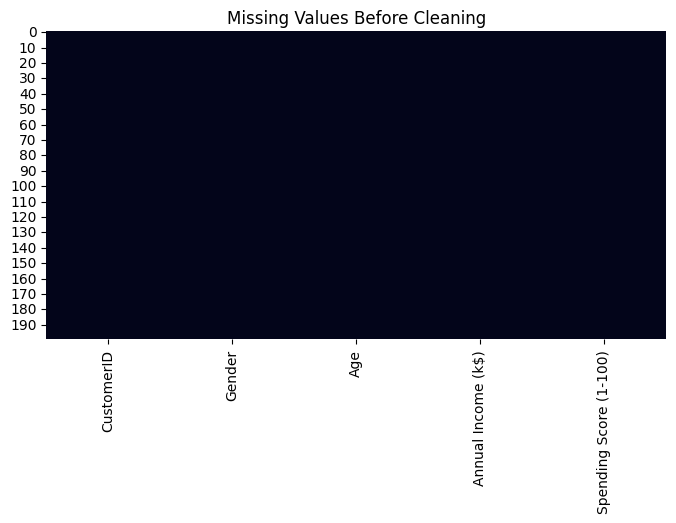

In [15]:
# Step 2: Visual Check - Missing Values Before Cleaning
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Before Cleaning")
plt.show()

In [16]:
# Step 3: Handle Missing Values
missing_before = df.isnull().sum().sum()
df = df.dropna()
missing_after = df.isnull().sum().sum()


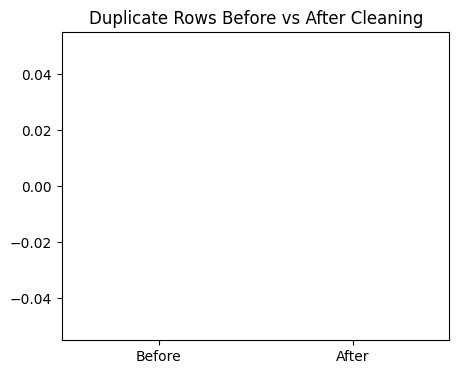

In [17]:
# Step 4: Remove Duplicates
duplicates_before = df.duplicated().sum()
df = df.drop_duplicates()
duplicates_after = df.duplicated().sum()

# Duplicates bar chart
plt.figure(figsize=(5,4))
sns.barplot(x=['Before', 'After'], y=[duplicates_before, duplicates_after])
plt.title("Duplicate Rows Before vs After Cleaning")
plt.show()


In [18]:
# Step 5: Standardize Text Columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

In [19]:
# Step 6: Rename Columns (Clean & Uniform)
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [20]:
# Step 7: Check / Fix Data Types
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], errors='coerce')
    # Auto detect date columns
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col], errors='raise', dayfirst=True)
            df[col] = df[col].dt.strftime('%d-%m-%Y')
            print(f"Converted {col} to dd-mm-yyyy")
        except:
            pass

# Ensure age column is int
if 'age' in df.columns:
    df['age'] = df['age'].astype(int)


/tmp/ipython-input-3711738158.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise', dayfirst=True)


In [21]:
# Step 8: Quick Summary After Cleaning
print("\n----- Info After Cleaning -----")
print(df.info())

# Before/after summary table
summary_table = pd.DataFrame({
    "Metric": ["Rows", "Missing Values", "Duplicate Rows"],
    "Before Cleaning": [df_original.shape[0], missing_before, duplicates_before],
    "After Cleaning": [df.shape[0], missing_after, duplicates_after]
})
print("\n----- Before/After Cleaning Summary -----")
print(summary_table)


----- Info After Cleaning -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerid              200 non-null    int64 
 1   gender                  200 non-null    object
 2   age                     200 non-null    int64 
 3   annual_income_(k$)      200 non-null    int64 
 4   spending_score_(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

----- Before/After Cleaning Summary -----
           Metric  Before Cleaning  After Cleaning
0            Rows              200             200
1  Missing Values                0               0
2  Duplicate Rows                0               0


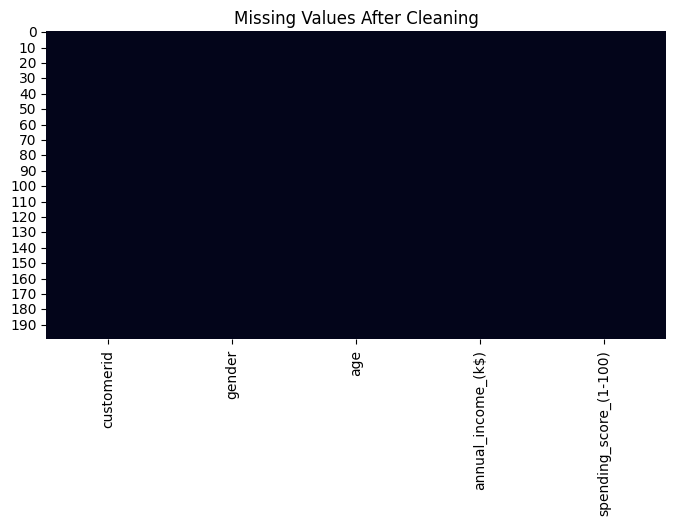

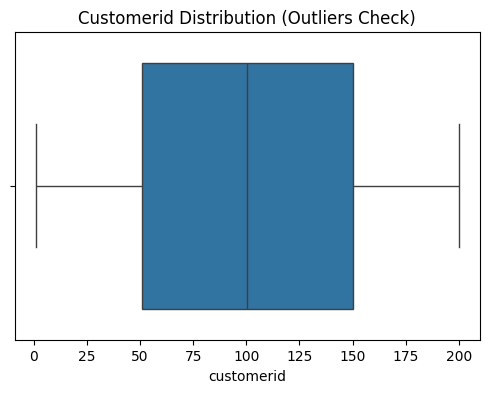

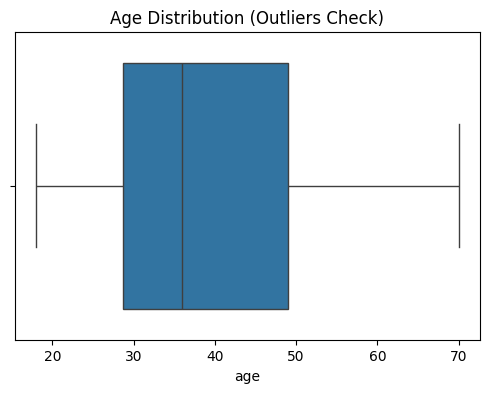

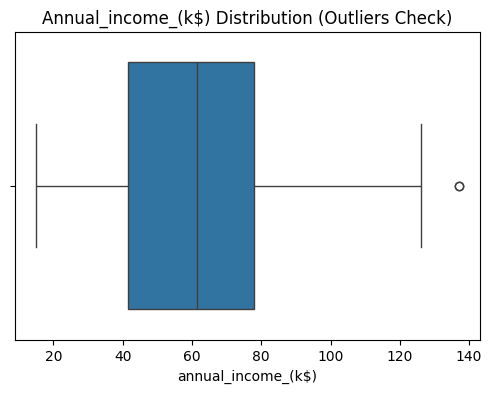

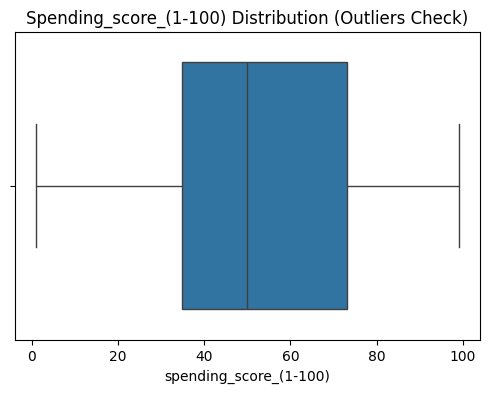

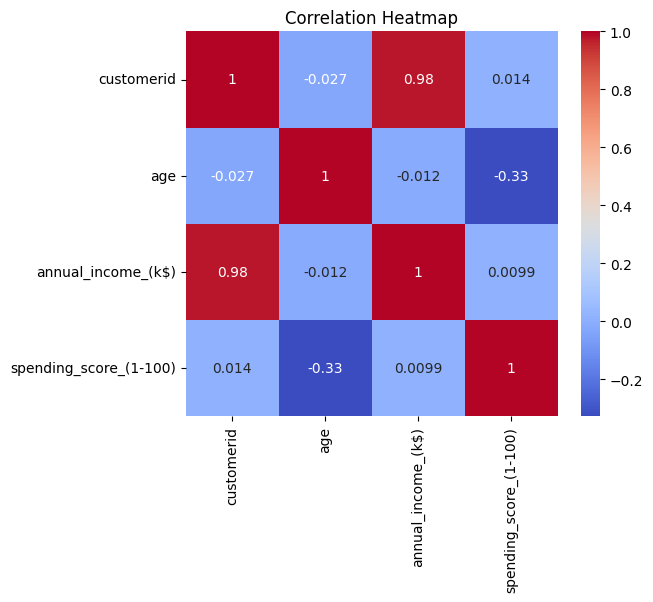

In [22]:
# Step 9: Visualizations for Extra Points
# Missing values after cleaning
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values After Cleaning")
plt.show()

# Boxplots for numeric columns
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col.capitalize()} Distribution (Outliers Check)")
    plt.show()

# Correlation heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(6,5))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()


In [23]:
# Step 10: Save Cleaned Dataset
df.to_csv('Mall_Customers_cleaned.csv', index=False)

# Download in Colab
from google.colab import files
files.download('Mall_Customers_cleaned.csv')

print("\nData cleaned successfully and saved as 'Mall_Customers_cleaned.csv'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Data cleaned successfully and saved as 'Mall_Customers_cleaned.csv'
